In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")




# Linear regression


Generamos el dataset, que es de la forma:
    $y = 4+3x_{1}+RuidoGaussiano(0,1)$
    
Es decir, una variable uniforme con un ruido Gaussiano de media 4

(array([ 5., 10., 16., 17., 11., 11., 11.,  7.,  9.,  3.]),
 array([ 3.23806212,  4.01869541,  4.79932871,  5.579962  ,  6.3605953 ,
         7.14122859,  7.92186189,  8.70249518,  9.48312848, 10.26376177,
        11.04439507]),
 <a list of 10 Patch objects>)

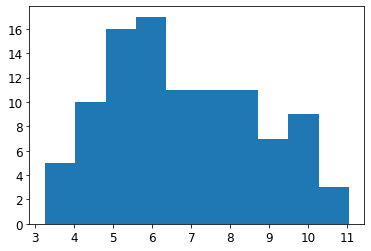

In [2]:
X = 2*np.random.rand(100,1) #Distribución uniforme con 100 valores
y = 4 + 3 * X + np.random.randn(100, 1) #Distribución normal con 100 valores, media 0 y desviación 1
plt.hist(y)

Saving figure generated_data_plot


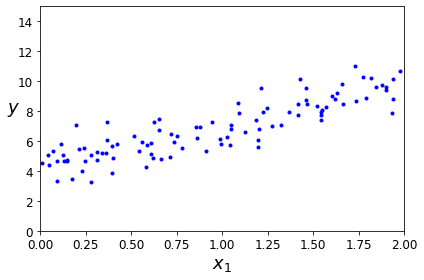

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) #axis([xmin, xmax, ymin, ymax])
save_fig("generated_data_plot")
plt.show()


Aplicando el modelo lineal, tenemos que hallar los parámetros que en este caso son w0 y w1:
$$y_{i}=w_{0}+w_{1}\cdot x_{i1}$$ 
con:
$$w_{LS}= (X^{T} X)^{-1}X^{T}y$$
siendo:
$$X = \begin{bmatrix}
 1& x_{11} \\ 
 1& x_{21}\\ 
 ...& ...\\ 
 1& x_{100\, 1}
\end{bmatrix}$$

$$y=X\cdot w$$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Hallamos wls

In [5]:
theta_best # Esperaríamos que fuera 4 y 3 (porque sabemos como se ha generado, pero se supone que no lo sabemos)

array([[4.21509616],
       [2.77011339]])

Ahora hacemos predicciones de dos puntos para sacar la recta

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

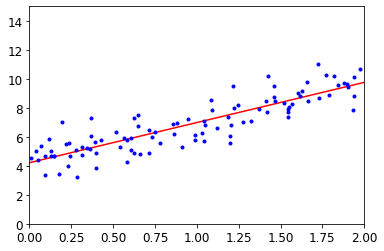

In [7]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Ahora lo hacemos con scikit learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Linear regression using batch gradient descent

Seguimos haciendo regresión lineal, pero para encontrar el mínimo de la función objetivo usamos gradient descent